# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: (Sergio García)  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [ ]:
import pandas as pd
import requests
import google.generativeai as palm

In [ ]:
import os

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-26 23:55:22--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-26 23:55:22--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [ ]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [ ]:
df.shape

(200, 64)

In [ ]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI

In [ ]:
df["type"].value_counts()

,count
type,
Video,86
Sidecar,83
Image,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   inputUrl                            200 non-null    object 
 1   id                                  200 non-null    int64  
 2   username                            200 non-null    object 
 3   url                                 200 non-null    object 
 4   fullName                            200 non-null    object 
 5   biography                           200 non-null    object 
 6   externalUrls                        200 non-null    object 
 7   externalUrl                         200 non-null    object 
 8   externalUrlShimmed                  200 non-null    object 
 9   followersCount                      200 non-null    int64  
 10  followsCount                        200 non-null    int64  
 11  hasChannel                          200 non-n

In [ ]:
from datetime import datetime
datetime.fromtimestamp(int())

datetime.datetime(1970, 1, 1, 0, 0)

In [ ]:
df["date"] = pd.to_datetime(df["timestamp"])

In [ ]:
df["timestamp"].max()

'2025-05-21T21:01:28.000Z'

In [ ]:
df["timestamp"].min()

'2025-05-05T00:59:11.000Z'

In [ ]:
df["likesCount"].sort_values(ascending=False)

,likesCount
138,1927755
184,1886670
175,1812728
176,1734008
3,1590803
...,...
57,98256
125,98127
55,84260
1,83824


In [ ]:
df[df["likesCount"]==df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors,date
138,https://www.instagram.com/f1/,3630879158915563525,f1,https://www.instagram.com/p/DJjeVuZiAAF/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-12 12:55:46+00:00


In [ ]:
df["likesCount"].max()

1927755

Es el post con más likes porque es sobre el anuncio de la Formula 1, ahora en la pantalla grande y con la actuación estelar de Brad Pitt. Es un hito en la historia del cine ya que no han sido numerosas las hoistorias recreadas sobre este importante deporte a motor


## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


Es importante limpiar el texto de los captions por el tipo de lenguaje que existe en las redes sociales, los emojis,las url's y menciones, pueden alterar el mensaje y retardar la identificación del mismo caption

Los tres tipos de ruido que removería serían:
1. Emojis: Brad Pitt 😮‍💨
2. Url: https:/formula1/.com
3. Menciones: @

In [ ]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1


In [ ]:
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)
    palabras = [palabra for palabra in texto.split() if palabra not in stopwords]
    return " ".join(palabras)

In [ ]:
df['clean_text'] = df['caption_clean'].apply(limpiar_texto)


## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [ ]:
import os

In [ ]:
import os
os.environ["OPENAI_API_KEY"] =
from openai import OpenAI

client = OpenAI()

In [ ]:
from openai import OpenAI

client = OpenAI()


In [ ]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text

In [ ]:
call_llm("quiero clasificar los contenidos de unos post de instagram de la formula uno, dame tres categorías")

'Claro, aquí tienes tres categorías en las que podrías clasificar los contenidos de los posts de Instagram de la Fórmula 1:\n\n1. **Carreras y Eventos**: Posts relacionados con las carreras, incluyendo resultados, clasificaciones, y resúmenes de eventos. También se pueden incluir anuncios de próximos grandes premios.\n\n2. **Pilotos y Equipos**: Contenidos dedicados a los pilotos, sus actuaciones, entrevistas, y los equipos, incluyendo actualizaciones sobre su rendimiento y cambios en la alineación.\n\n3. **Detrás de Escenas**: Posts que muestran el lado menos conocido de la Fórmula 1, como el trabajo en el paddock, la preparación de los autos, y aspectos personales de los pilotos y equipos.\n\nEstas categorías te ayudarán a organizar y clasificar los posts de manera efectiva.'

In [ ]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['sentimiento'] = sample['caption_clean'].apply(classify_sentiment)


In [ ]:
sample['sentimiento'].value_counts()


,count
sentimiento,
positivo,8
neutral,2


<Axes: xlabel='sentimiento', ylabel='count'>

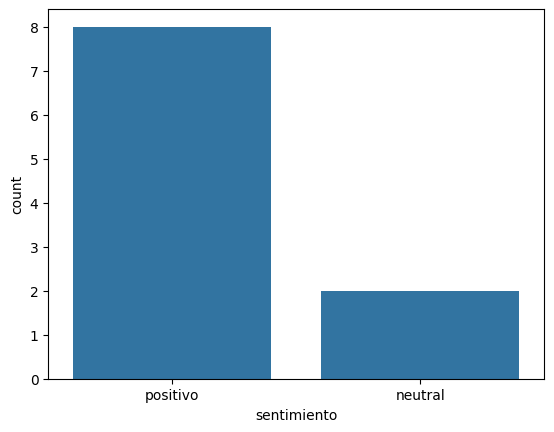

In [ ]:
import seaborn as sns
sns.barplot(sample['sentimiento'].value_counts())

El sentimiento que más se genera es el positivo, lo que quiere decir que la cuenta genera una conexión vital que es de acuerdo a las interacciones con los seguidores y que esto da a entender fidelidad en la reacción y distribución del contenido

El contenido que genera más sentimientos positivos es todo lo relacionado a las carreras que son la fuente directa de información que quiere saber el consumidor y seguidor. No existen los sentimientos negativos en lo que arroja la gráfica

El sentimiento negativo no marca en la gráfica y de esta manera no se puede determinar un pico que sea significativo


## 🗂 Sección 4 (Temas)
9. Haga lo mismo con sentimiento con tipo de contenido y tema
10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [ ]:
import time

def classify_sentiment(text):
    prompt = (f"Clasifica el tipo de contenido del siguiente caption de Instagram como "
              f"'resultados_estadísticas', 'entre_bastidores' o 'tecnología_vehículos' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

# ⚠️ Usa una muestra para no exceder la cuota de la API
sample = df.sample(10, replace = True ,random_state=42)
sample['topic'] = sample['caption_clean'].apply(classify_sentiment)


In [ ]:
sample['topic'].value_counts()

,count
topic,
entre_bastidores,6
resultados_estadísticas,4


In [ ]:
pd.crosstab(sample["type"],sample["topic"])

topic,entre_bastidores,resultados_estadísticas
type,,
Image,0,2
Sidecar,1,2
Video,5,0


Para el tema entre bastidores lo mejor es usar el cotenido de video ya que es la forma en la que se puede transmitir de manera directa la emoción que se vive a pocos minutos de iniciar una carrera

Los resultados y estadisticas deben ser presentadas en una imagen, ya que es la forma más efectiva de comunicar lo simple

<Axes: xlabel='topic', ylabel='count'>

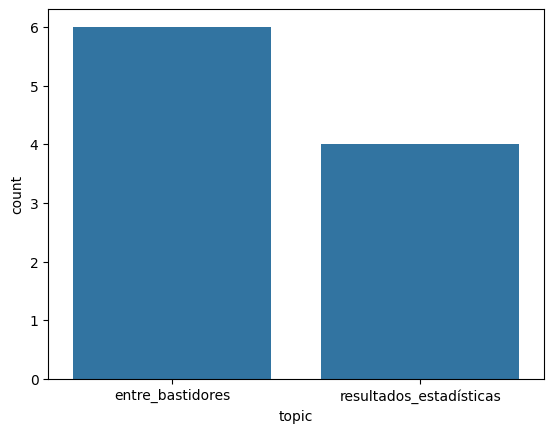

In [ ]:
sns.barplot(sample["topic"].value_counts())

<Axes: xlabel='topic', ylabel='type'>

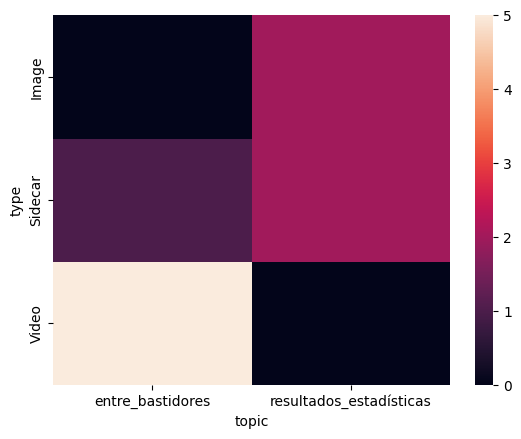

In [ ]:
sns.heatmap(pd.crosstab(sample["type"],sample["topic"]))

In [ ]:
call_llm("ayúdame a crear dos insight para el tema dominante, según el gráfico el tema dominante es tecnología vehículos")

'¡Claro! Aquí tienes dos insights sobre la tecnología en vehículos:\n\n### Insight 1: Evolución hacia la movilidad sustentable\nLa creciente preocupación por el cambio climático y la transición hacia energías renovables han impulsado el desarrollo de vehículos eléctricos. Esto no solo refleja un cambio en las preferencias de los consumidores, que ahora buscan opciones más sostenibles, sino también una oportunidad para que las empresas innoven en tecnologías de carga rápida y baterías de larga duración. La inversión en infraestructura de carga y la integración de fuentes de energía limpias puede acelerar aún más esta tendencia.\n\n### Insight 2: Conectividad y seguridad vehicular\nLa introducción de tecnologías avanzadas como la conectividad 5G, inteligencia artificial y sistemas de asistencia al conductor ha transformado la experiencia de conducción. Los vehículos ahora no solo son medios de transporte, sino también plataformas conectadas que pueden comunicarse entre sí y con la infrae

El tema que predomina es tecnología en vehículos

1. La persona que le interesa el tema va a buscar la forma de justificar los avances en tecnología para poder darle importancia y novedad
2. Los usuarios de hoy buscan sincronía y compatibilidad entre el auto y sus dispositivos electronicos, de manera en la que sienta comodidad al ir al volante y pueda personalizar su experiencia


## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


In [ ]:
call_llm("""Describe cada cluster en una frase (actividad y tono). damelo como una lista de pythonDescribe cada cluster en una frase (actividad y tono).
""" )

'Claro, aquí tienes una lista de Python que describe cada cluster en una frase, incluyendo actividad y tono:\n\n```python\nclusters = [\n    {"actividad": "Investigación de mercado", "tono": "Analítico y objetivo"},\n    {"actividad": "Desarrollo de producto", "tono": "Creativo y colaborativo"},\n    {"actividad": "Marketing digital", "tono": "Energético y persuasivo"},\n    {"actividad": "Atención al cliente", "tono": "Empático y resolutivo"},\n    {"actividad": "Gestión de proyectos", "tono": "Organizado y estratégico"},\n    {"actividad": "Capacitación y formación", "tono": "Motivador y educativo"},\n    {"actividad": "Análisis financiero", "tono": "Preciso y detallado"},\n    {"actividad": "Comunicaciones internas", "tono": "Cordial y transparente"},\n]\n```\n\nCada diccionario en la lista representa un cluster específico, con la actividad y el tono correspondientes.'

Priorizaría el segmento que está enfocado en realizar una investigación de mercado en la que se pueda entender como se comporta el consumidor frente a la marca y de que manera puede influir en lo que consume el cliente


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


In [ ]:
import pandas as pd

datos = [

{"actividad": "Investigación de mercado", "tono": "Analítico y objetivo"},
{"actividad": "Desarrollo de producto", "tono": "Creativo y colaborativo"},
{"actividad": "Marketing digital", "tono": "Energético y persuasivo"},
{"actividad": "Atención al cliente", "tono": "Empático y resolutivo"},
{"actividad": "Capacitación y formación", "tono": "Motivador y educativo"},
{"actividad": "Análisis financiero", "tono": "Preciso y detallado"},
{"actividad": "Comunicaciones internas", "tono": "Cordial y transparente"}

]

In [ ]:
def generar_caption(topic, tone='inspirador'):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres "
              f"sobre el tema '{topic}'. Tono {tone}. No incluyas hashtags ni menciones.")
    return call_llm(prompt)

for t in ['exploración espacial', 'innovación', 'ciudadanía global']:
    print('→', generar_caption(t))


→ ¡El universo nos espera! Cada estrella y planeta es un misterio por descubrir. La exploración espacial no solo amplía nuestro conocimiento, sino que también nos recuerda el potencial infinito de la humanidad. ¡Sigamos soñando y explorando!
→ La innovación es el motor que impulsa el cambio. Cada idea brillante es una chispa que puede transformar el mundo. Atrévete a soñar en grande y a dar esos pequeños pasos que marcarán la diferencia. ¡El futuro está en tus manos!
→ En un mundo interconectado, cada acción cuenta. Ser ciudadano global es abrazar la diversidad y trabajar juntos por un futuro mejor. ¡Seamos agentes de cambio y construyamos puentes de comprensión y respeto!


El tema elegido es la innovación, es la base de desarrollo de todo e conopcimiento humano y que puede cambiar el destino de generacioes ye generaciones: el tono debe ser de esperanza, generar una conexión a partir de las emociones e invitando a el consumidor a creer en u futuro diferente. Los horarios deben estar enfocados a las mañanas entre las 8 y 10 am y las tardes noches entre 5 y 7 pm

La meta para la campaña es generar una mayor afinidad con el cliente y consumidor del contenido con el cuál se puede establecer una relación importante y en la que se pueden establecer lazos familiares que potencien la marca de generaciones en generaciones. El KPI medidor de desempeño es las veces que el usuario da click en los elementos de valor de la empresa y de que manera los servicios son consumidos en número tangibles


### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.
